In [32]:
# Dataset 2 : Wines

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import MinMaxScaler
# model 
from sklearn.mixture import GaussianMixture
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)

X_scaled = scaler.fit_transform(X)

In [51]:
gm_bic= []
gm_score=[]
for i in range(2,15):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -6866.734176602535
Log-likelihood score for number of cluster(s) 2: 6.193210707493047
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -7040.07946221726
Log-likelihood score for number of cluster(s) 3: 6.780737412296435
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -6769.714851153703
Log-likelihood score for number of cluster(s) 4: 7.026422902401609
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -6516.765764480314
Log-likelihood score for number of cluster(s) 5: 7.285525591574708
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -6269.9277964050925
Log-likelihood score for number of cluster(s) 6: 7.549336384444393
------

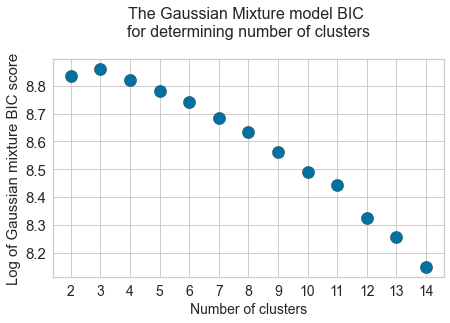

In [52]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [54]:
gm_aic= []
gm_aic_score=[]
for i in range(2,15):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
    print("AIC for number of cluster(s) {}: {}".format(i,gm.aic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_aic.append(-gm.aic(X_scaled))
    gm_aic_score.append(gm.score(X_scaled))

AIC for number of cluster(s) 2: -7676.787498325975
Log-likelihood score for number of cluster(s) 2: 6.193210707493047
----------------------------------------------------------------------------------------------------
AIC for number of cluster(s) 3: -8257.397161160772
Log-likelihood score for number of cluster(s) 3: 6.780737412296435
----------------------------------------------------------------------------------------------------
AIC for number of cluster(s) 4: -8394.296927317288
Log-likelihood score for number of cluster(s) 4: 7.026422902401609
----------------------------------------------------------------------------------------------------
AIC for number of cluster(s) 5: -8548.61221786397
Log-likelihood score for number of cluster(s) 5: 7.285525591574708
----------------------------------------------------------------------------------------------------
AIC for number of cluster(s) 6: -8709.038627008822
Log-likelihood score for number of cluster(s) 6: 7.549336384444393
-------

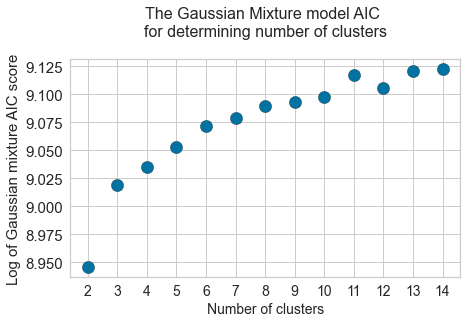

In [55]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model AIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_aic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture AIC score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [35]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score
for i in range(2,7):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
    y_pred1 = gm.predict(X_scaled)

    print('v_measure_score {} :{}'.format(i,v_measure_score(y,y_pred1,beta =1.0)))
    print('homogeneity_score {} :{}'.format(i,homogeneity_score(y,y_pred1)))
    print('completeness_score {} :{}'.format(i,completeness_score(y,y_pred1)))

v_measure_score 2 :0.8908001373104599
homogeneity_score 2 :0.902875350227873
completeness_score 2 :0.8790436536728006
v_measure_score 3 :0.6259616858192445
homogeneity_score 3 :0.9111265298904437
completeness_score 3 :0.47674865092118196
v_measure_score 4 :0.5636850089487159
homogeneity_score 4 :0.9033155315136261
completeness_score 4 :0.4096601150097855
v_measure_score 5 :0.48818335409131525
homogeneity_score 5 :0.9380775770440354
completeness_score 5 :0.32994464149796265
v_measure_score 6 :0.45390483969099793
homogeneity_score 6 :0.930763045899711
completeness_score 6 :0.300136027718109


time for running the algorithm = 36.45258327499323 s


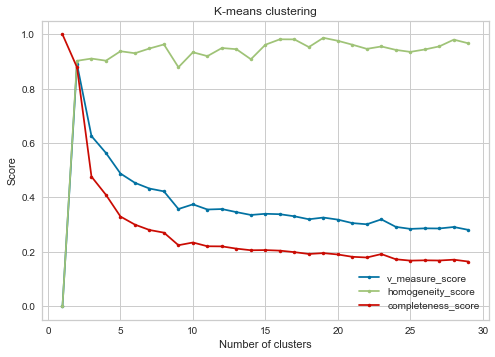

In [60]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score

v_measure_score_list = []
homogeneity_score_list = []
completeness_score_list = []

time1 = time.perf_counter()

for i in range(1,30):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
    y_pred1 = gm.predict(X_scaled)

    v_measure_score_list.append(v_measure_score(y,y_pred1,beta =1.0))
    homogeneity_score_list.append(homogeneity_score(y,y_pred1))
    completeness_score_list.append(completeness_score(y,y_pred1))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

number_of_clusters = [i for i in range(1,30)]
fig, ax = plt.subplots()
ax.set_title('K-means clustering')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score')
ax.plot(number_of_clusters, v_measure_score_list, marker=".", label="v_measure_score")
ax.plot(number_of_clusters, homogeneity_score_list, marker=".", label="homogeneity_score")
ax.plot(number_of_clusters, completeness_score_list, marker=".", label="completeness_score")
ax.legend()
plt.show()

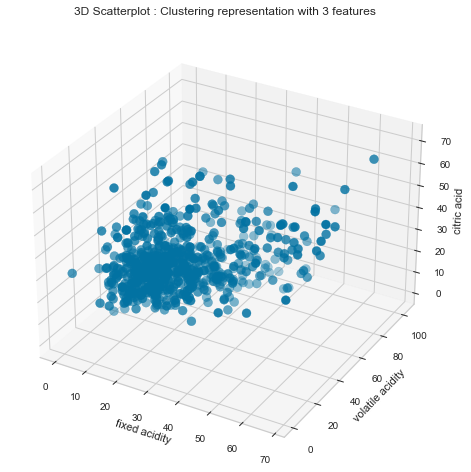

In [36]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection ='3d')

sctt = ax.scatter(pd.DataFrame(df, columns =['fixed acidity']),
                    pd.DataFrame(df, columns =['volatile acidity']),
                    pd.DataFrame(df, columns =['citric acid']),
                    s=80)

plt.title("3D Scatterplot : Clustering representation with 3 features",pad = 15)
ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')
ax.set_zlabel('citric acid')
plt.savefig('3d_scatterplot.png')

In [74]:
gm = GaussianMixture(n_components=3,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
X_gm = gm.fit_predict(X_scaled)

b = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df_cluster = pd.read_csv(b)
df_cluster = df_cluster.take([10*i for i in range(649)], axis = 0)
df_cluster = df_cluster.apply(LabelEncoder().fit_transform)

df_new = pd.DataFrame(X_gm, columns =['cluster'] )
df_cluster.loc[:,"cluster"] = df_new.cluster
print(df_cluster.head())

# save the data
df_cluster.to_csv('wine_quality_EM.csv', index=False)

df_new.head()
print(df.shape)

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      1             22                27           35             172   
10     1             33                27           40              10   
20     1             14                80           47               6   
30     1             37                22           38             105   
40     1             19                20           38              24   

    chlorides  free sulfur dioxide  total sulfur dioxide  density  pH  \
0          29                   44                   151      365  17   
10         17                    8                    49       53  16   
20         13                   27                    59        8  50   
30         28                   18                   123      295  37   
40        101                   64                   139      140  28   

    sulphates  alcohol  quality  cluster  
0          19        4        3      0.0  
10         30       45        